In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

/tmp/ipykernel_10657/196433047.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  return KP_NEG*(1/dist2)


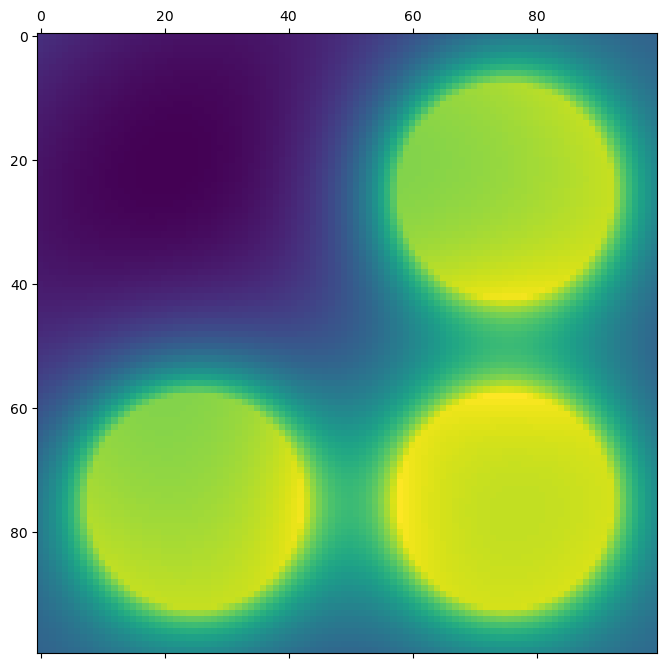

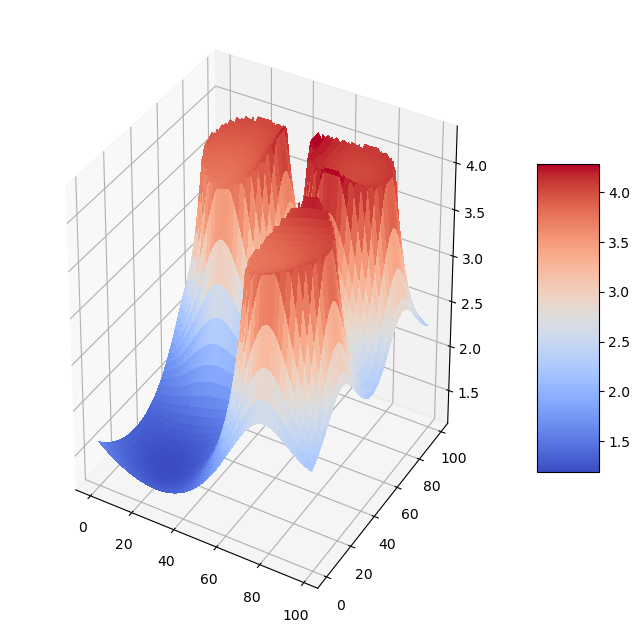

In [2]:
plt.rcParams['figure.figsize'] = [8,8]      # This line sets the size of the figures (you can change the numbers)

KP_POS = 0.1
KP_NEG = 1
goal = np.array( [50,50] )                   # This is where we want to go 
pmap = np.zeros( [100,100] )                  # This is where we will store the potential functions

obstacles = [
    [25,75],
    [75,75],
    [75,25],
]

def pos_potential(ori, pos) :
    dist2 = np.inner( (ori/20 - pos/20)/1, (ori/20 - pos/20)/1)
    return KP_POS*dist2

def neg_potential(ori, pos) :
    dist2 = np.inner( (ori/30 - pos/30)/1, (ori/30 - pos/30)/1)
    #if dist2 < 1 :
     #   return KP_NEG
    return KP_NEG*(1/dist2)

X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
X, Y = np.meshgrid(X, Y)

for x in range(100) :
    for y in range(100) :
        pos = pos_potential(goal, np.array([x,y]))
        if pos > 3:
            pos = 3
        pmap[x][y] += pos
        for o in obstacles :
            neg = neg_potential(np.array(o), np.array([x,y]))
            if neg > 3:
                neg = 3
            pmap[x][y] += neg

            
plt.matshow(pmap)
plt.show()
# Define the figure
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, pmap, cmap=cm.coolwarm, linewidth=0, 
antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [3]:
KP_POS = 0.1
KP_NEG = 1

def gradient_attraction(pos, goal):
    x = KP_POS * (pos[0]/20 - goal[0]/20)
    y = KP_POS * (pos[1]/20 - goal[1]/20)
    return [x,y]

def gradient_repulsion(pos, obstacle):
    x_p = pos[0]
    x_g = obstacle[0]
    y_p = pos[1]
    y_g = obstacle[1]

    d_x = x_p - x_g
    d_y = y_p - y_g

    x = KP_NEG * ((1/25) - 1/(d_x)) * (1/((d_x)**2))
    y = KP_NEG * ((1/25) - 1/(d_y)) * (1/((d_y)**2))
    #x = KP_NEG * (2 * (x_p/1 - x_g/1))/(((x_g/30 - x_p/30)**2 + (y_g/30 - y_p/30)**2)**2)
    #y = KP_NEG * (2 * (y_p/1 - y_g/1))/(((x_g/30 - x_p/30)**2 + (y_g/30 - y_p/30)**2)**2)
    return [x,y]

def gradient(pos, attr, rep):

    gradient_arr = []
    gradient_arr.append(gradient_attraction(pos, attr))
    
    for r in rep:
        gradient_arr.append(gradient_repulsion(pos, r))

    x = 0.0
    y = 0.0
    for grad in gradient_arr:
        x += grad[0]
        y += grad[1]

    return [x,y]

In [4]:
grad = gradient([45,45], [50, 50], [[25,75],[75,75],[75,25]])
grad[0] = -grad[0]
grad[1] = -grad[1]
print(grad)

[0.02486203703703704, 0.02486203703703704]
